In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def load_data(dataset):
    data = pd.read_csv(f'../{dataset}/metrics/additional/{dataset}-additional-metrics.csv')
    return data

def plot_quadrant_analysis():
    datasets = ['netifier', 'dat', 'hsd', 'casa', 'hoasa']
    # Extract precision and recall values

    fig, axes = plt.subplots(3,2, figsize=(12, 12))

    for i in range(5):
        data = load_data(datasets[i])
        ax = axes[i//2, i%2]
        precision = data['precision']
        recall = data['recall']

        # Determine quadrant center (mean values)
        center_precision = sum(precision) / len(precision)
        center_recall = sum(recall) / len(recall)

        ax.axhline(center_recall, color='gray', linewidth=1)  # Horizontal center
        ax.axvline(center_precision, color='gray', linewidth=1)  # Vertical center

        # Plot each strategy
        for j in range(len(data)):
            ax.scatter(precision[j], recall[j], label=data['strategy'][j].upper())
            ax.text(precision[j] + 0.025, recall[j], data['strategy'][j].upper(), fontsize=9)

        # Labels and title
        ax.set_xlabel("Precision")
        ax.set_ylabel("Recall")
        ax.set_title("Precision vs Recall - " + datasets[i].upper())
        ax.grid(True, linestyle='--', alpha=0.5)

    axes.flat[-1].axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


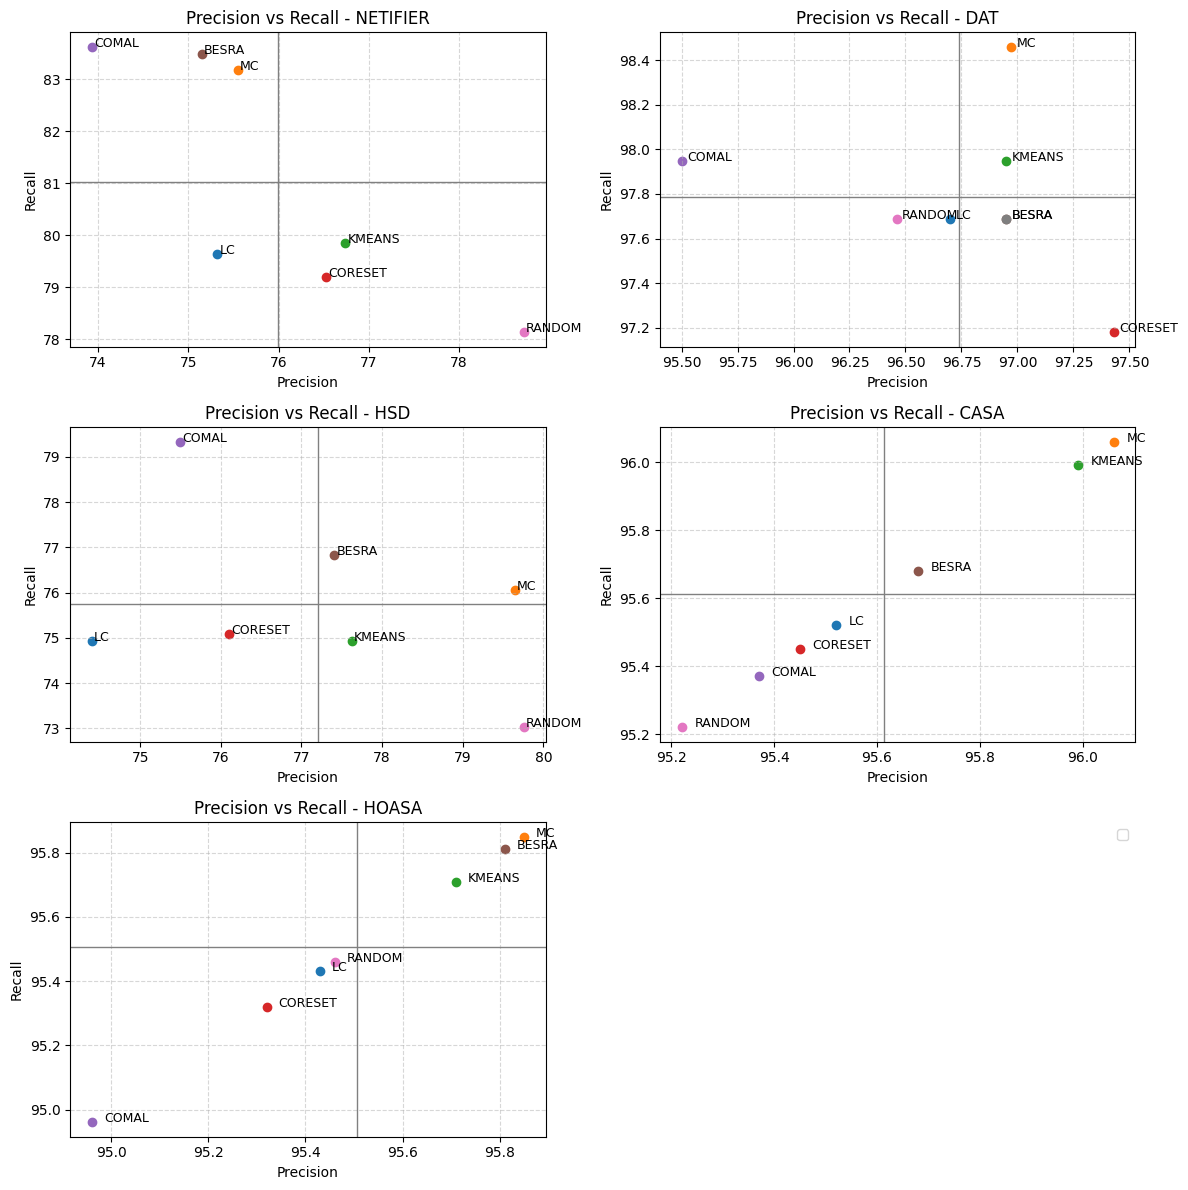

In [2]:
plot_quadrant_analysis()